In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Input training data
df = pd.read_csv('C:\\Users\\09350\\Documents\\SpringBoard\\capstone2\\capstone2\\data\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
#peek at the data
df.head()

#Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID: Customer ID<br>
genderCustomer: gender (female, male)<br>
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)<br>
PartnerWhether: the customer has a partner or not (Yes, No)<br>
Dependents: Whether the customer has dependents or not (Yes, No)<br>
tenure: Number of months the customer has stayed with the company<br>
PhoneService: Whether the customer has a phone service or not (Yes, No)<br>
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)<br>
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)<br>
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)<br>
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)<br>
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)<br>
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
Contract: The contract term of the customer (Month-to-month, One year, Two year)<br>
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)<br>
PaymentMethod: The customer’s payment method (Electronic check, mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges: The amount charged to the customer monthly<br>
TotalCharges: The total amount charged to the customer<br>
Churn: Whether the customer churned or not (Yes or No)

In [6]:
#look at the values for target variable
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print('\n')
print('Roughly a quarter of the customers in this data set have churned!')

No     5174
Yes    1869
Name: Churn, dtype: int64


Roughly a quarter of the customers in this data set have churned!


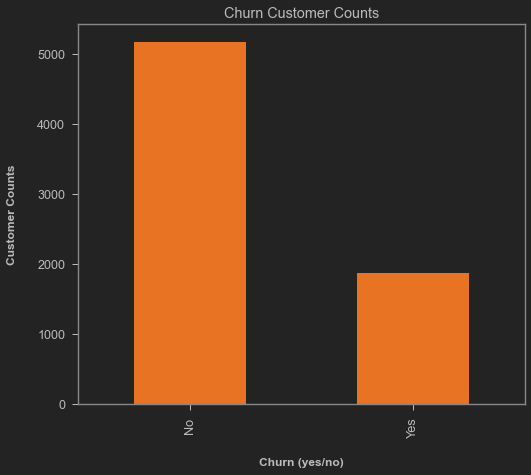

In [7]:
df_plt = df.groupby(['Churn']).size().plot.bar(x="Churn",y="Counts",color='#e87322')

# Set x-axis label
df_plt.set_xlabel("Churn (yes/no)", labelpad=20, weight='bold', size=12)

# Set y-axis label
df_plt.set_ylabel("Customer Counts", labelpad=20, weight='bold', size=12)

# set Title
df_plt.set_title('Churn Customer Counts')

plt.show()

In [8]:
#different types for data in this dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# converting churn to numerical variable for analyzing
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1
df['Churn'] = df['Churn'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df[['tenure','MonthlyCharges','TotalCharges']].describe(include = 'all')

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043
unique,NaN,NaN,6531
top,NaN,NaN,
freq,NaN,NaN,11
mean,32.371149,64.761692,NaN
std,24.559481,30.090047,NaN
min,0.000000,18.250000,NaN
25%,9.000000,35.500000,NaN
50%,29.000000,70.350000,NaN
75%,55.000000,89.850000,NaN


In [12]:
print('We see that Tenure ranges from 0 (new customer) to 6 years, Monthly charges range from $18 to $118, etc')

We see that Tenure ranges from 0 (new customer) to 6 years, Monthly charges range from $18 to $118, etc


In [13]:
#Total charges is obect in the data types converting to number
totalCharges = df.columns.get_loc("TotalCharges")
new_col = pd.to_numeric(df.iloc[:, totalCharges], errors='coerce')
df.iloc[:, totalCharges] = pd.Series(new_col)

In [14]:
#checking if the TotalCharges datatype is now resolved
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


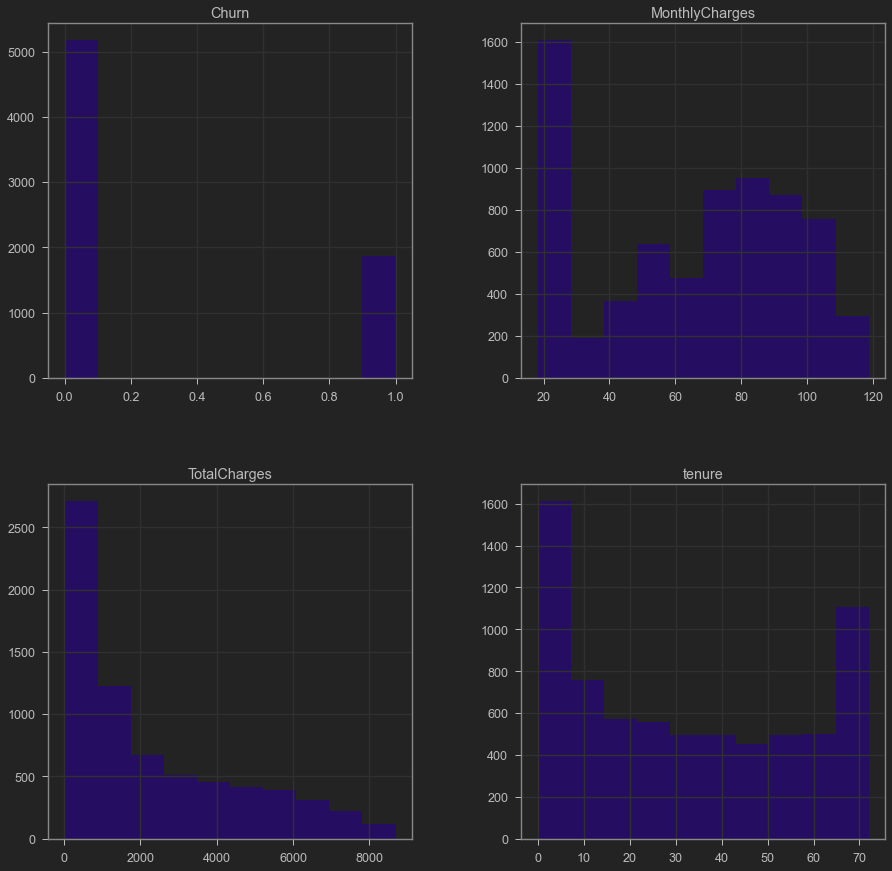

In [15]:
#Visual summary of the numerical variables in the dataframe
pd.DataFrame.hist(df[['MonthlyCharges','TotalCharges','tenure','Churn']], figsize= [15,15],color='#250e62');

In [16]:
# Looks like Total charges has missing values -- Missing Values

#df.isnull().values.any()

#(df.isnull().sum())

print(df.columns[df.isnull().any()])

Index(['TotalCharges'], dtype='object')


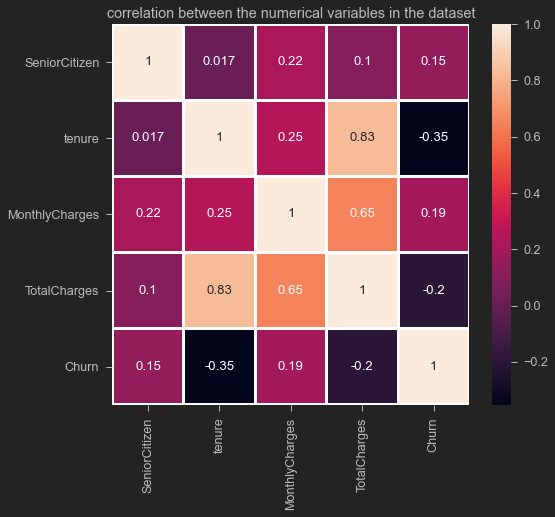

In [17]:
sns.heatmap(df.corr(),annot=True,linewidths=2)
plt.title('correlation between the numerical variables in the dataset')
plt.show()

In [18]:
import pandas_profiling

In [19]:
# dealing with missing values by imputing

# Handle missing values for nan_column (TotalCharges)
from sklearn.impute import SimpleImputer

# Find the column number for TotalCharges (starting at 0).
total_charges_idx = df.columns.get_loc("TotalCharges")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df.iloc[:, total_charges_idx] = imputer.fit_transform(df.iloc[:, total_charges_idx].values.reshape(-1, 1))
df.iloc[:, total_charges_idx] = pd.Series(df.iloc[:, total_charges_idx])

In [20]:
# Validate that we have addressed any NaN values
print(df.isnull().values.any())
df.isnull().sum()

False


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#Lets looks a a data profiling report using pandas_profiling API
#pandas_profiling.ProfileReport(df)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### EDA & Data Visualization

In [24]:
sns.set()
sns.set_style('darkgrid')
sns.axes_style("whitegrid")
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

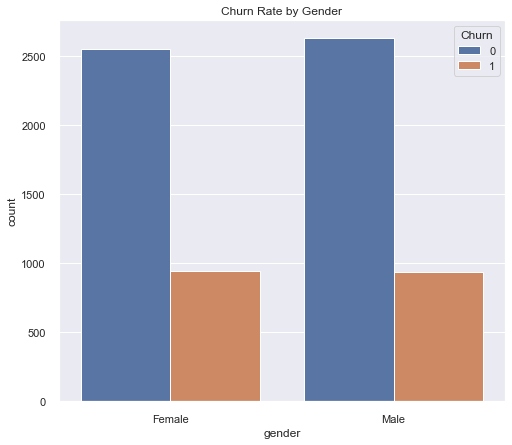

In [25]:
# churn rate by gender
sns.color_palette("hls", 8)
#sns.barplot(x="gender",y=df["Churn"].mean() ,data=df)
sns.countplot(df.gender,hue=df.Churn).set_title('Churn Rate by Gender')

plt.show()

In [26]:
# plotting gender
mean_churn = df[['gender','Churn']].groupby('gender').mean()
print(mean_churn)
print("Female churn is little higher, but not that big difference")

           Churn
gender          
Female  0.269209
Male    0.261603
Female churn is little higher, but not that big difference


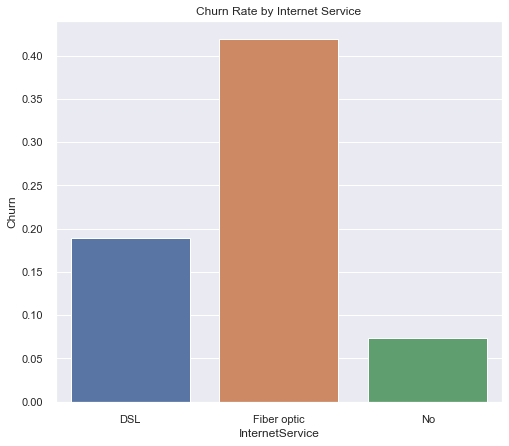

In [27]:
# churn rate by InternetService
sns.barplot(x="InternetService",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by Internet Service')

plt.show()

In [28]:
# plotting Internet Servive type
isp_churn = df[['InternetService','Churn']].groupby('InternetService').mean()
print(isp_churn)
print("Fiber Optic customers are churning at a higher rate")

                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
Fiber Optic customers are churning at a higher rate


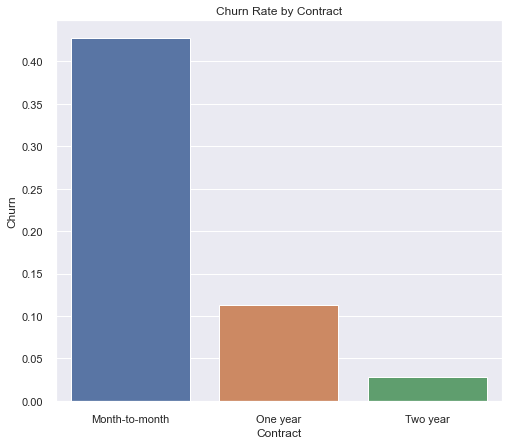

In [29]:

# churn rate by Contract type
sns.barplot(x="Contract",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by Contract')

plt.show()

In [30]:
# plotting Churn rate by Contract type
cont_churn = df[['Contract','Churn']].groupby('Contract').mean()
print(cont_churn)
print("Month to Month subscribers are churning at a higher rate")

                   Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319
Month to Month subscribers are churning at a higher rate


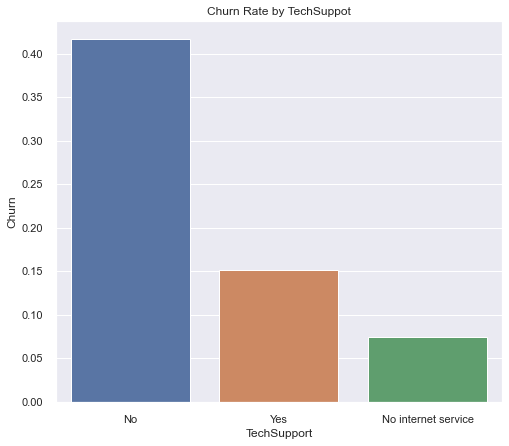

In [31]:
# churn rate by TechSupport
sns.barplot(x="TechSupport",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by TechSuppot')

plt.show()

In [32]:
# plotting Churn rate by TechSupport
tech_churn = df[['TechSupport','Churn']].groupby('TechSupport').mean()
print(tech_churn)
print("Customers who did not use  Tech Support are churning at a higher rate")

                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663
Customers who did not use  Tech Support are churning at a higher rate


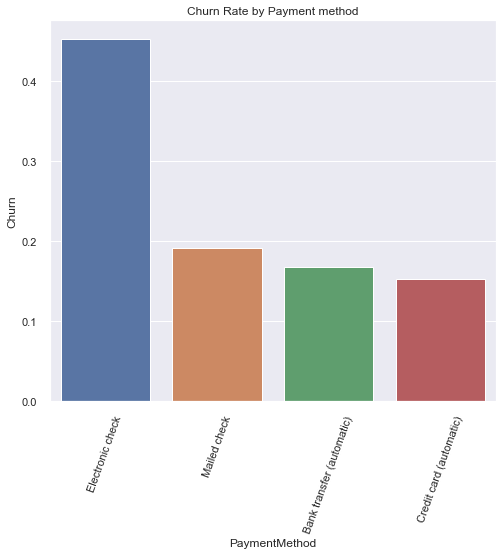

In [33]:
# churn rate by Payment method
sns.barplot(x="PaymentMethod",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by Payment method')
plt.xticks(rotation=70)

plt.show()

In [34]:
# plotting PaymentMethod
paym_churn = df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()
print(paym_churn)
print("Customers who use checks as payment method are churning at higher rate")

                              Churn
PaymentMethod                      
Bank transfer (automatic)  0.167098
Credit card (automatic)    0.152431
Electronic check           0.452854
Mailed check               0.191067
Customers who use checks as payment method are churning at higher rate


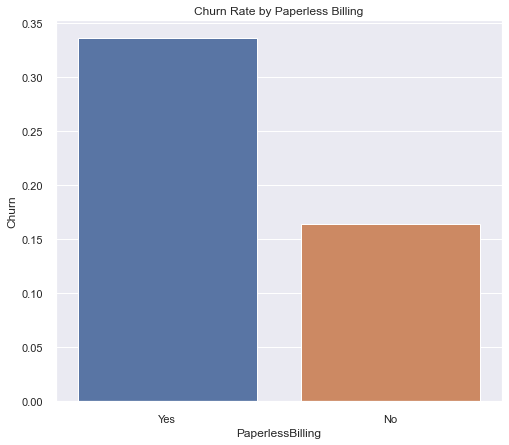

In [35]:
# churn rate by Paperless Billing
sns.barplot(x="PaperlessBilling",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by Paperless Billing')
plt.xticks(rotation=0)

plt.show()

In [36]:
# plotting PaperlessBilling
ebill_churn = df[['PaperlessBilling','Churn']].groupby('PaperlessBilling').mean()
print(ebill_churn)
print("Customers who are on paperless billing are churning at higher rate")

                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651
Customers who are on paperless billing are churning at higher rate


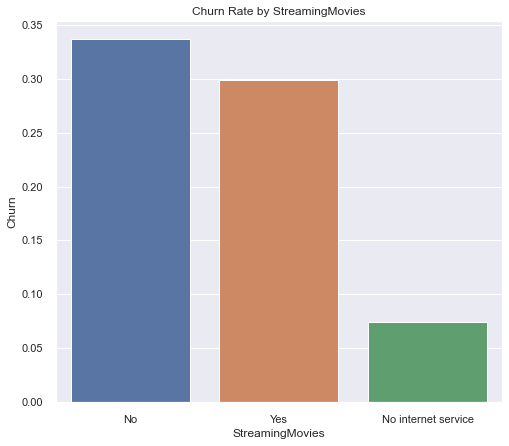

In [37]:
# churn rate by StreamingMovies
sns.barplot(x="StreamingMovies",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by StreamingMovies')
plt.xticks(rotation=0)

plt.show()

In [38]:
# plotting PaperlessBilling
smove_churn = df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()
print(smove_churn)
print("Customers who not steaming movies subscribers are churning at higher rate")

                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
Customers who not steaming movies subscribers are churning at higher rate


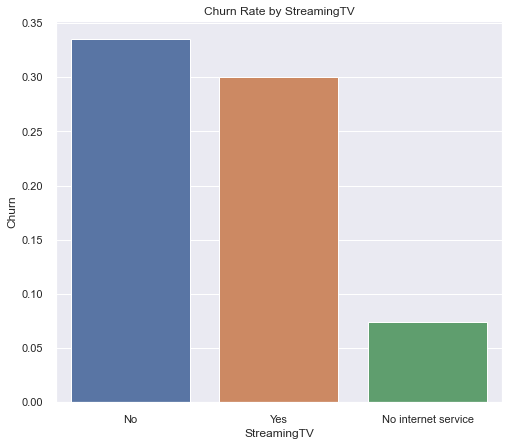

In [39]:
# churn rate by StreamingTV
sns.barplot(x="StreamingTV",y=df["Churn"]
            ,data=df,ci=None).set_title('Churn Rate by StreamingTV')
plt.xticks(rotation=0)

plt.show()

In [40]:
# plotting PaperlessBilling
stv_churn = df[['StreamingTV','Churn']].groupby('StreamingTV').mean()
print(stv_churn)
print("Customers who not steaming tv subscribers are churning at higher rate")

                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
Customers who not steaming tv subscribers are churning at higher rate


In [41]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

It shows that if the customer"s tenure is long then churn rate is low


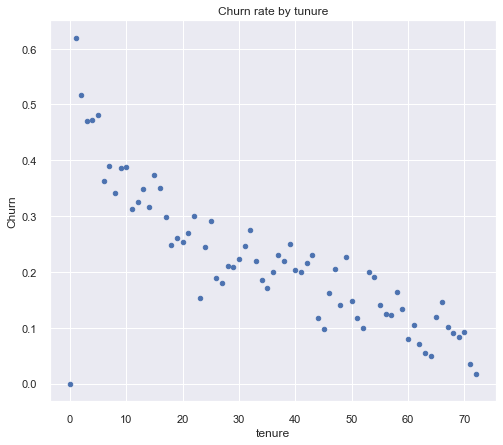

In [42]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df_plot = df.groupby('tenure').Churn.mean().reset_index()
df_plot.plot.scatter(x='tenure',y='Churn')
plt.title('Churn rate by tunure')

print('It shows that if the customer"s tenure is long then churn rate is low')

In [43]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

There seems to be no relation for Churn and MonthlyCharges


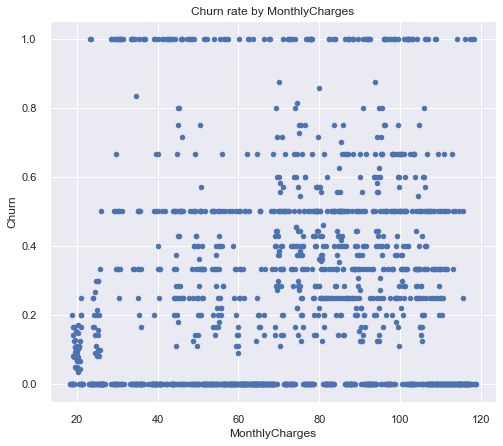

In [44]:
# other variables

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df_plot = df.groupby('MonthlyCharges').Churn.mean().reset_index()
df_plot.plot.scatter(x='MonthlyCharges',y='Churn')
plt.title('Churn rate by MonthlyCharges')

print('There seems to be no relation for Churn and MonthlyCharges')



Monthly Charges seems to be roughly normal distribution


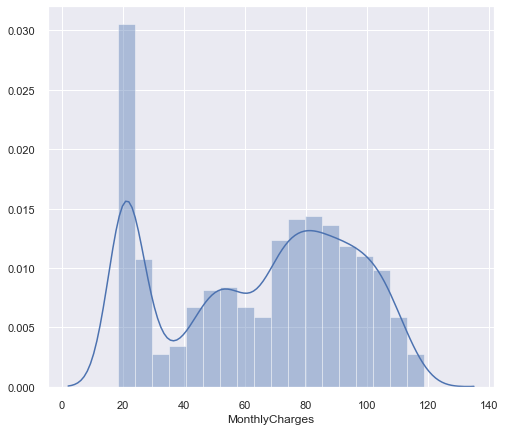

In [45]:
sns.distplot(df['MonthlyCharges'])
print('Monthly Charges seems to be roughly normal distribution')

Tenure Distribution seems to be high at the ends so a portion of the customers have either had lowest and highest tenure periods


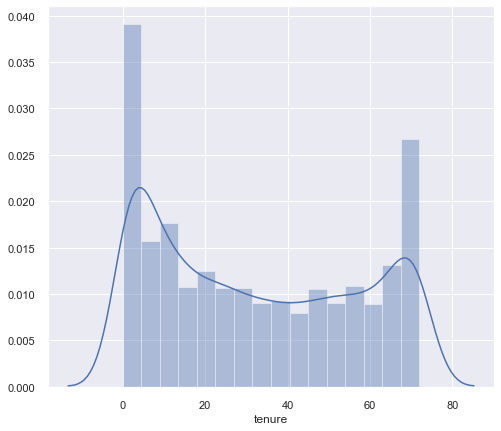

In [46]:
sns.distplot(df['tenure'])
print('Tenure Distribution seems to be high at the ends so a portion of the customers have either had lowest and highest tenure periods')

### Data Wrangling

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'customerID']
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)
print('\nAll Categorical Columns: ', categorical_columns)

All Features:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Categorical Features:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Continuous Features:  ['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

All Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [49]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df.columns:
    if df[column].dtype == object and column != 'customerID':
        if df[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df[column] = le.fit_transform(df[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_clean_data = pd.get_dummies(data = df,columns = dummy_columns)

In [50]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

In [51]:
# Dropping varibles that are not neeeded and also target variables
X = df_clean_data.drop(['Churn','customerID'], axis=1)

# target variable
y = df_clean_data['Churn']

In [52]:
df_clean_data.info()
df_clean_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


#### Split the data into Train and Test datasets
Train on one set and test and measure on the test set.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)

Realized that the data set is facing a class imbalance so apply Under Sampling technique to standardized the dataset.

In [120]:
# import the StandardScaler
from sklearn.preprocessing import StandardScaler

# initiate a StandardScaler and fit to training feature set.
scaler = StandardScaler().fit(X_train)

# Scale the training data using transform
X_train = scaler.transform(X_train)

from imblearn.under_sampling import RandomUnderSampler

# initiante a random under sampler
rus = RandomUnderSampler()

# Store in new random undersampled variables
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

### Machine Learning Modelling

Now the data has been pre-processed by various transformations, label encoding and standarizing the data. We are ready to begin the model phase where we focus on trying to evaluate various machine learning classification modelling techiniques, fitting these models to the train feature set and evaluating the performance on the prediction the reserved test set. Since we are going to be evaluating various technqiue and trying to tune these models will require us to use a metric that can be used across various model outcome to determine the best model to select. For this customer churn problem, I think the recall metric will suite the best as we want to reduce the number of false negatives. In this case it might be okay to have false positives as if a non-churning customer is classified and a churn customer, the company would not have incurred loss, while the opposite might come with a huge impact to the company and incurr losses.

I've found a better techiqnue evaluate various classification models using Cross Validation technique

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In the most machine learning pipelines I have used the standard test train split and in this Cross validation method it splits the training features (X_train_rus) into 5 folds (I choose the default) there by using training data better to predict and score the models based on the recall classfication metric we've choosen.

In [133]:
lr = LogisticRegression()
drc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

model = []
cross_val = []
recall = []

for i in (lr, drc, rfc, xgb):
    model.append(i.__class__.__name__)
    cross_val.append(cross_validate(i, X_train_rus, y_train_rus,cv=5, scoring='recall'))
    
for d in range(len(cross_val)):
    recall.append(cross_val[d]['test_score'].mean())

In [134]:
model_recall = pd.DataFrame
pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
LogisticRegression,0.804276
DecisionTreeClassifier,0.680451
RandomForestClassifier,0.739285
XGBClassifier,0.756126


The Logistic Regression modelling seems to have a better recall compared to the next better modelling techqniue which is the xgBoost.

### Tuning Hyper-parameters

In [135]:
# Logistic Regression
# parameters to be searched
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(lr, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8700096516627183 for {'C': 0.0001, 'solver': 'liblinear'}


#### Logistric regression model

 This type of statistical classification modelling is commonly used for predicting binary variables. It modeles the log odds of the probability of the target variable.

In [121]:
#import Logistic regression model
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import precision_score, recall_score

#Initialize the log reg model instance
lr = LogisticRegression()

# fit the training data
lr.fit(X_train, y_train)

# Measureing the model accuracy
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Train accuracy:', round(train_acc, 4))
print('Test accuracy:', round(test_acc, 4))
print('\n')

train_prec = round(precision_score(y_train,y_pred_train),4)
test_prec = round(precision_score(y_test,y_pred_test),4)

train_rec = round(recall_score(y_train,y_pred_train),4)
test_rec = round(recall_score(y_test,y_pred_test),4)

print('Training precision: {}'.format(train_prec))
print('Training recall: {}'.format(train_rec))
print('\n')
print('Test precision: {}'.format(test_prec))
print('Test recall: {}'.format(test_rec))


Train accuracy: 0.7638
Test accuracy: 0.2655


Training precision: 0.7436
Training recall: 0.805


Test precision: 0.2655
Test recall: 1.0


#### Model performance metrics

Accuracy = Pct of correctly classified predictions (i.e, churn and non-churn) <br>
Precision = Pct of total positive class predictions that were correctly classfied<br>
Recall = Pct of total positive class samples that were correctly classfied

#### Decision Tree


In [88]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
# # Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion ='gini', max_depth=5, random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test set labels
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

train_acc_dt = accuracy_score(y_train, y_pred_dt_train)
test_acc_dt = accuracy_score(y_test, y_pred_dt_test)

print('Train accuracy:', round(train_acc_dt, 4))
print('Test accuracy:', round(test_acc_dt, 4))
print('\n')

train_prec_dt = round(precision_score(y_train,y_pred_dt_train),4)
test_prec_dt = round(precision_score(y_test,y_pred_dt_test),4)

train_rec_dt = round(recall_score(y_train,y_pred_dt_train),4)
test_rec_dt = round(recall_score(y_test,y_pred_dt_test),4)

print('Training precision: {}'.format(train_prec_dt))
print('Training recall: {}'.format(train_rec_dt))
print('\n')
print('Test precision: {}'.format(test_prec_dt))
print('Test recall: {}'.format(test_rec_dt))

print('model is precise with training but fails to identify more than half of customers')

Test set accuracy: 0.72
Train accuracy: 0.8065
Test accuracy: 0.7937


Training precision: 0.6547
Training recall: 0.5726


Test precision: 0.6299
Test recall: 0.5401
model is precise with training but fails to identify more than half of customers


### Random Forest

In [99]:
#from sklearn import metrics
#from sklearn.ensemble import RandomForestClassifier

# Start an instance of RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', min_samples_split = 285)

# fit the model to trainig data
RF.fit(X_train, y_train)

# predict the labels
y_pred_rf_train = RF.predict(X_train)
y_pred_rf_test = RF.predict(X_test)

f1_rf = metrics.f1_score(y_pred_rf_test, y_test)

print("F1 Score (test):"+str(f1_rf))

metrics.classification_report(y_test, y_pred_rf_test)

print(metrics.classification_report(y_test, y_pred_rf_test))

train_prec_rf = round(precision_score(y_train,y_pred_rf_train),4)
test_prec_rf = round(precision_score(y_test,y_pred_rf_test),4)

train_rec_rf = round(recall_score(y_train,y_pred_rf_train),4)
test_rec_rf = round(recall_score(y_test,y_pred_rf_test),4)

print('Training precision: {}'.format(train_prec_rf))
print('Training recall: {}'.format(train_rec_rf))
print('\n')
print('Test precision: {}'.format(test_prec_rf))
print('Test recall: {}'.format(test_rec_rf))

print("\n")

importance = zip(RF.feature_importances_, X)

for rank in sorted(importance, key = lambda x: x[0], reverse = True):
    print(rank)
    
print("\n")

F1 Score (test):0.5214446952595937
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1552
           1       0.71      0.41      0.52       561

    accuracy                           0.80      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.79      0.80      0.78      2113

Training precision: 0.7074
Training recall: 0.4381


Test precision: 0.7108
Test recall: 0.4118


(0.15058286939157908, 'Contract_Month-to-month')
(0.11565808643544379, 'OnlineSecurity_No')
(0.10440696998415662, 'tenure')
(0.09329871403009848, 'TotalCharges')
(0.09320305238276173, 'Contract_Two year')
(0.07074792371457395, 'InternetService_Fiber optic')
(0.06566134556255863, 'TechSupport_No')
(0.04397300879679095, 'MonthlyCharges')
(0.038055064198746276, 'PaymentMethod_Electronic check')
(0.028850762150499986, 'Contract_One year')
(0.02648820060779119, 'InternetService_DSL')
(0.025833478725521313, 'OnlineBackup_No')
(0.01655343955

### Extreme Gradient Boosting (xGB)

In [109]:
#import xgboost as xgb
#from matplotlib import pyplot

# instansitate xbg classifier
xg_cl = xgb.XGBRFClassifier(objective='binary:logistic', n_estimators=10,seed=123)

# Fit on train
xg_cl.fit(X_train, y_train)

#Predict on Test
y_pred_xgb_train = xg_cl.predict(X_train)
y_pred_xgb_test = xg_cl.predict(X_test)

#Accuracy Scores
accuracy_xgb = float(np.sum(y_pred_xgb_test==y_test))/y_test.shape[0]

print('accuracy: %f' % (accuracy_xgb))

f1_xgb = metrics.f1_score(y_pred_xgb_test, y_test)

print("F1 Score:"+str(f1_xgb))

metrics.classification_report(y_test, y_pred_xgb_test)

print(metrics.classification_report(y_test, y_pred_xgb_test))

print("\n")

train_prec_xgb = round(precision_score(y_train,y_pred_xgb_train),4)
test_prec_xgb = round(precision_score(y_test,y_pred_xgb_test),4)

train_rec_xgb = round(recall_score(y_train,y_pred_xgb_train),4)
test_rec_xgb = round(recall_score(y_test,y_pred_xgb_test),4)

print('Training precision: {}'.format(train_prec_xgb))
print('Training recall: {}'.format(train_rec_xgb))
print('\n')
print('Test precision: {}'.format(test_prec_xgb))
print('Test recall: {}'.format(test_rec_xgb))

print("\n")


importance = zip(xg_cl.feature_importances_, X)

for rank in sorted(importance, key = lambda x: x[0], reverse = True):
    print(rank)

accuracy: 0.803124
F1 Score:0.5763747454175152
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.50      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



Training precision: 0.695
Training recall: 0.5627


Test precision: 0.6722
Test recall: 0.5045


(0.47182062, 'Contract_Month-to-month')
(0.13212639, 'InternetService_Fiber optic')
(0.06621624, 'InternetService_DSL')
(0.048428386, 'tenure')
(0.044380188, 'OnlineSecurity_No')
(0.038071003, 'TechSupport_No')
(0.016612278, 'TotalCharges')
(0.014647642, 'MultipleLines_Yes')
(0.013603278, 'MultipleLines_No phone service')
(0.012875929, 'OnlineBackup_No')
(0.011087111, 'MonthlyCharges')
(0.009676405, 'PhoneService')
(0.009507693, 'StreamingMovies_Yes')
(0.009485692, 'PaymentMethod_Electronic check')
(0.008081857, 'SeniorCi

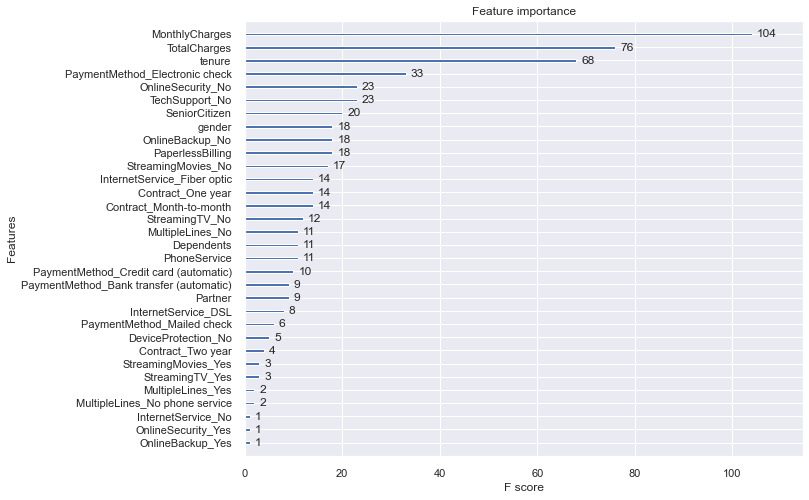

In [101]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xg_cl, ax=ax)

In [110]:
df_clean_data['proba'] = xg_cl.predict_proba(df_clean_data[X_train.columns])[:,1]
y_pred_prob = xg_cl.predict_proba(X_test)[:,1]

In [111]:
df_clean_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,proba
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,1,0,0,0,0,1,0,0.540049
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,1,0,0,0,0,1,0.128942
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,1,0,0,0,0,0,1,0.330419
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,0,0,0,1,0,1,0,0,0,0.130152
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,1,0,0,0,0,1,0,0.667152


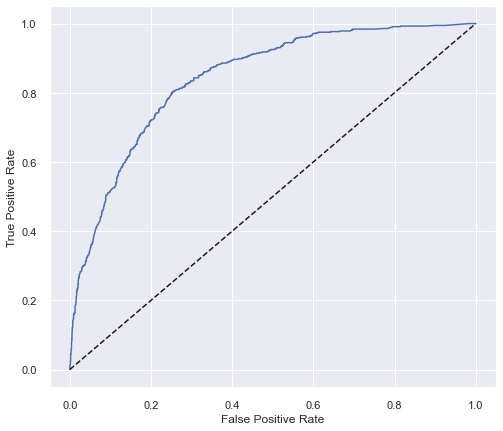

In [112]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.plot([0,1],[0,1],"k--")

plt.show()

In [113]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8427611086608964


### Select machine learning model

In [142]:
#Initialize the log reg model instance
lr = LogisticRegression(solver='liblinear', C=0.0001)

# fit the training data
lr.fit(X_train, y_train)

X_test_lr = scaler.transform(X_test)

# Measureing the model accuracy
y_pred_lr = lr.predict(X_test_lr)

# classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1552
           1       0.49      0.81      0.61       561

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.72      0.74      2113

